## All Cancer Integration Notebook 03: Cancer type classification

This is the Jupyter Notebook to classify cancer types into three levels.

In [2]:
import scanpy as sc
from rich import print

In [3]:
# Load the meta AnnData
pre = sc.read_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer/all_cancer_meta_anndata_scVI_pca.h5ad')
post = sc.read_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer/all_cancer_meta_anndata_scVI_cluster.h5ad')

In [6]:
print(pre)
print(post)

AnnData object with n_obs × n_vars = 1300958 × 559
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 
'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 
'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 
'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 
'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'hvg', 'neighbors', 'pca', 
'sample_barcode_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

AnnData object with n_obs × n_vars = 1300958 × 559
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 
'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 
'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 
'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels', 'leiden_scVI'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 
'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'hvg', 'leiden', 'leiden_scVI_colors', 
'neighbors', 'pca', 'sample_barcode_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

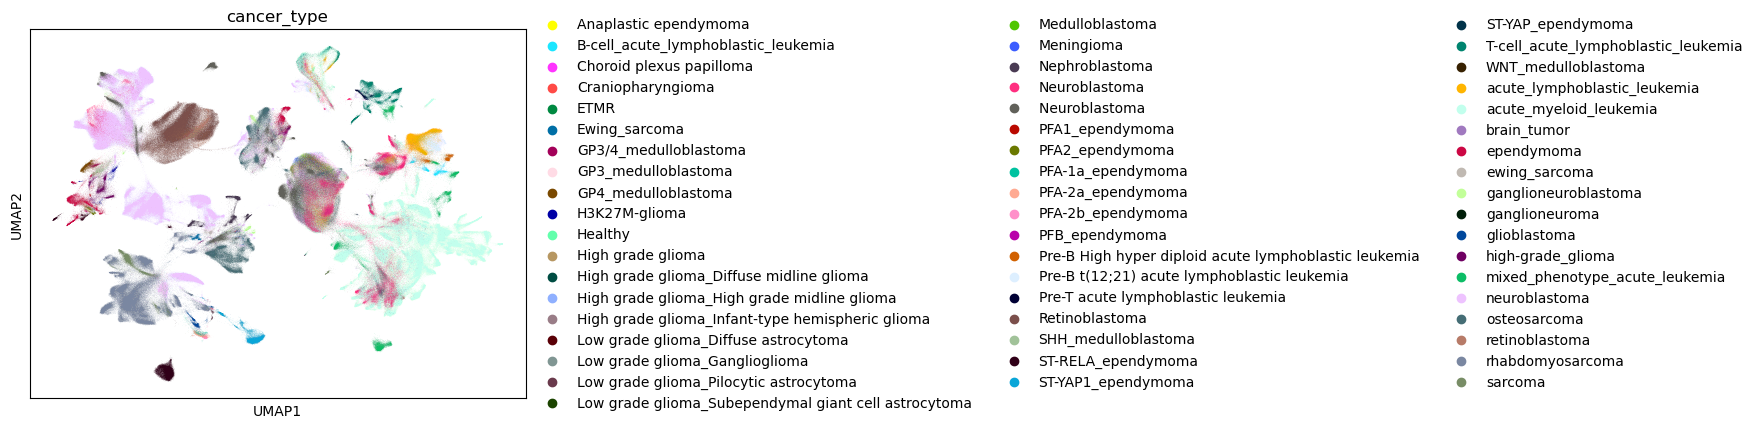

In [9]:
sc.pl.umap(pre, color=['cancer_type'])

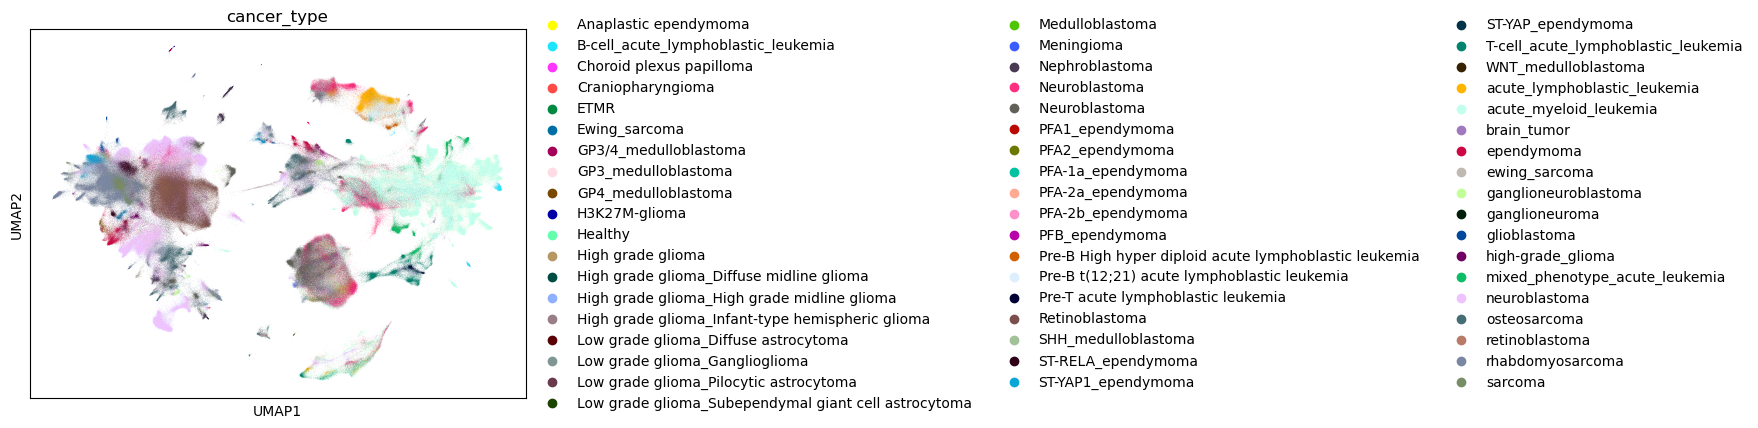

In [11]:
sc.pl.umap(post, color=['cancer_type'])

## 1. Classify cancer types into three levels

In [106]:
prex = pre.copy()
postx = post.copy()

metas = {'Pre-integration': prex, 'Post-integration': postx}

## 1. Separate cancer types into three columns

major_cancer_type: leukemia, brain_tumor, bone_cancer, rhabdomyosarcoma, neuroblastoma, retinoblastoma, kidney_cancer & healthy_donor

cancer_type: e.g. ependymoma (from brain_tumor) & healthy_donor

cancer_subtype: e.g. PFA1_ependymoma (from brain_tumor) & healthy_donor

In [107]:
major_cancer_type_dict = {
    'GSE235923': 'leukemia',
    'GSE236351': 'leukemia',
    'GSE154109': 'leukemia',
    'GSE235063': 'leukemia',
    'GSE132509': 'leukemia',
    'GSE227122': 'leukemia',
    'GSE148218': 'leukemia',
    'GSE102130': 'brain_tumor',
    'GSE125969': 'brain_tumor',
    'GSE221776': 'brain_tumor',
    'GSE189939': 'brain_tumor',
    'GSE231860': 'brain_tumor',
    'GSE155446': 'brain_tumor',
    'GSE141460': 'brain_tumor',
    'GSE198896': 'bone_cancer',
    'GSE243347': 'bone_cancer',
    'GSE162454': 'bone_cancer',
    'GSE152048': 'bone_cancer',
    'GSE195709': 'rhabdomyosarcoma',
    'GSE174376': 'rhabdomyosarcoma',
    'GSE137804': 'neuroblastoma',
    'GSE140819': 'neuroblastoma',
    'GSE216176': 'neuroblastoma',
    'GSE147766': 'neuroblastoma',
    'GSE192906': 'neuroblastoma',
    'GSE168434': 'retinoblastoma',
    'GSE249995': 'retinoblastoma',
    'PRJNA737188': 'retinoblastoma',
    'GSE223373': 'kidney_cancer',
}

healthy_donor_dict = {
    'GSM3872444_PBMMC_3': 'healthy_donor',
    'GSM3872442_PBMMC_1': 'healthy_donor',
    'GSM3872443_PBMMC_2': 'healthy_donor',

    'GSM5959142_Healthy_donor_PBMC': 'healthy_donor',

    'GSM4654667_F366': 'healthy_donor',
    'GSM4088788_F107': 'healthy_donor',
    'GSM4088787_F106': 'healthy_donor',
    'GSM4654668_F379': 'healthy_donor',
    'GSM4088786_F7': 'healthy_donor',
    'GSM4088785_F2': 'healthy_donor',

    'GSM6946667_WT-RBG-N_matrix': 'healthy_donor',
}

In [108]:
len(major_cancer_type_dict)

29

In [109]:
# Create the major_cancer_type column

for meta in metas:
    print(meta)
    adata = metas[meta]

    adata.obs['major_cancer_type'] = adata.obs['dataset'].map(major_cancer_type_dict)
    # Update the healthy_donor info
    adata.obs.loc[adata.obs['sample_barcode'].isin(healthy_donor_dict.keys()), 'major_cancer_type'] = adata.obs['sample_barcode'].map(healthy_donor_dict)

    print(adata.obs[['major_cancer_type', 'cancer_type']])
    print(adata.obs['major_cancer_type'].value_counts())

Pre-integration

major_cancer_type  \
GSE235923_AAACCTGAGCTAGTGG-1_GSM7512002_Sample4D            leukemia   
GSE235923_AAACCTGAGGATGCGT-1_GSM7512002_Sample4D            leukemia   
GSE235923_AAACCTGAGGGTGTTG-1_GSM7512002_Sample4D            leukemia   
GSE235923_AAACCTGAGTTCGCGC-1_GSM7512002_Sample4D            leukemia   
GSE235923_AAACCTGCAATGAATG-1_GSM7512002_Sample4D            leukemia   
...                                                              ...   
GSE223373_TTCACGCAGCGAGTAAACGTATCA_GSM6946667_W...     healthy_donor   
GSE223373_TTCACGCAGTCGTAGAAAGACGGA_GSM6946667_W...     healthy_donor   
GSE223373_TTCACGCAGTGTTCTAGTACGCAA_GSM6946667_W...     healthy_donor   
GSE223373_TTCACGCATAGGATGATCTTCACA_GSM6946667_W...     healthy_donor   
GSE223373_TTCACGCATTCACGCACGAACTTA_GSM6946667_W...     healthy_donor   

                                                               cancer_type  
GSE235923_AAACCTGAGCTAGTGG-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
GSE235923_AAACCTGAGGATGCGT-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
GSE235923_AAACCTGAGGGTGTTG-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
GSE235923_AAACCTGAGTTCGCGC-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
GSE235923_AAACCTGCAATGAATG-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
...                                                                    ...  
GSE223373_TTCACGCAGCGAGTAAACGTATCA_GSM6946667_W...          Nephroblastoma  
GSE223373_TTCACGCAGTCGTAGAAAGACGGA_GSM6946667_W...          Nephroblastoma  
GSE223373_TTCACGCAGTGTTCTAGTACGCAA_GSM6946667_W...          Nephroblastoma  
GSE223373_TTCACGCATAGGATGATCTTCACA_GSM6946667_W...          Nephroblastoma  
GSE223373_TTCACGCATTCACGCACGAACTTA_GSM6946667_W...          Nephroblastoma  

[1300958 rows x 2 columns]

major_cancer_type
leukemia            419590
neuroblastoma       322798
brain_tumor         132384
retinoblastoma      129654
rhabdomyosarcoma    112186
bone_cancer          89666
healthy_donor        86217
kidney_cancer         8463
Name: count, dtype: int64

Post-integration

major_cancer_type  \
GSE235923_AAACCTGAGCTAGTGG-1_GSM7512002_Sample4D            leukemia   
GSE235923_AAACCTGAGGATGCGT-1_GSM7512002_Sample4D            leukemia   
GSE235923_AAACCTGAGGGTGTTG-1_GSM7512002_Sample4D            leukemia   
GSE235923_AAACCTGAGTTCGCGC-1_GSM7512002_Sample4D            leukemia   
GSE235923_AAACCTGCAATGAATG-1_GSM7512002_Sample4D            leukemia   
...                                                              ...   
GSE223373_TTCACGCAGCGAGTAAACGTATCA_GSM6946667_W...     healthy_donor   
GSE223373_TTCACGCAGTCGTAGAAAGACGGA_GSM6946667_W...     healthy_donor   
GSE223373_TTCACGCAGTGTTCTAGTACGCAA_GSM6946667_W...     healthy_donor   
GSE223373_TTCACGCATAGGATGATCTTCACA_GSM6946667_W...     healthy_donor   
GSE223373_TTCACGCATTCACGCACGAACTTA_GSM6946667_W...     healthy_donor   

                                                               cancer_type  
GSE235923_AAACCTGAGCTAGTGG-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
GSE235923_AAACCTGAGGATGCGT-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
GSE235923_AAACCTGAGGGTGTTG-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
GSE235923_AAACCTGAGTTCGCGC-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
GSE235923_AAACCTGCAATGAATG-1_GSM7512002_Sample4D    acute_myeloid_leukemia  
...                                                                    ...  
GSE223373_TTCACGCAGCGAGTAAACGTATCA_GSM6946667_W...          Nephroblastoma  
GSE223373_TTCACGCAGTCGTAGAAAGACGGA_GSM6946667_W...          Nephroblastoma  
GSE223373_TTCACGCAGTGTTCTAGTACGCAA_GSM6946667_W...          Nephroblastoma  
GSE223373_TTCACGCATAGGATGATCTTCACA_GSM6946667_W...          Nephroblastoma  
GSE223373_TTCACGCATTCACGCACGAACTTA_GSM6946667_W...          Nephroblastoma  

[1300958 rows x 2 columns]

major_cancer_type
leukemia            419590
neuroblastoma       322798
brain_tumor         132384
retinoblastoma      129654
rhabdomyosarcoma    112186
bone_cancer          89666
healthy_donor        86217
kidney_cancer         8463
Name: count, dtype: int64

Pre-integration

... storing 'major_cancer_type' as categorical


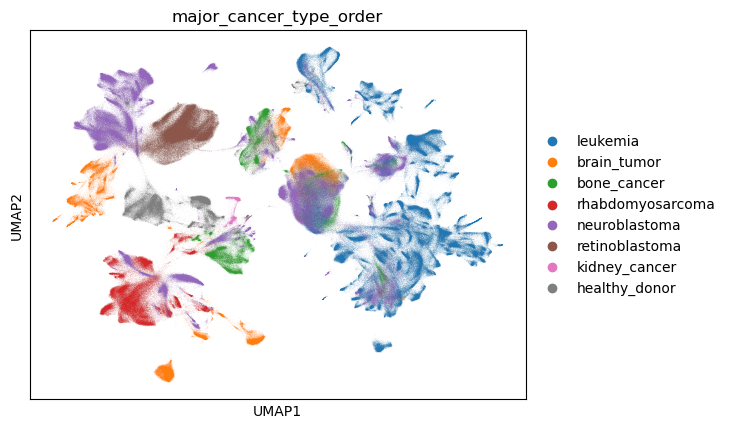

Post-integration

... storing 'major_cancer_type' as categorical


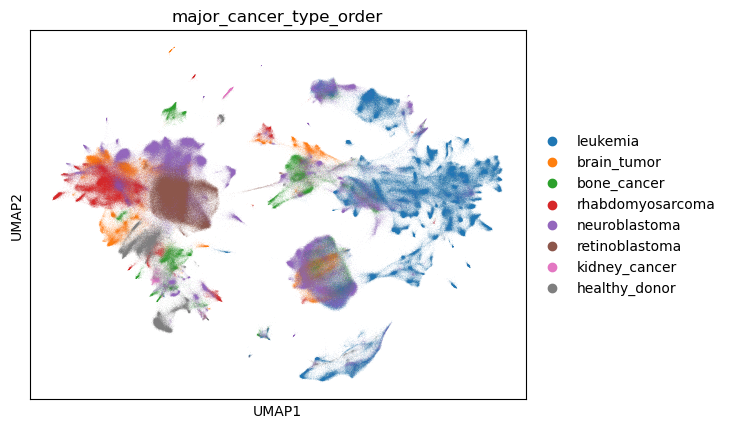

In [110]:
import pandas as pd

major_cancer_type_order = ['leukemia', 'brain_tumor', 'bone_cancer', 'rhabdomyosarcoma', 'neuroblastoma', 'retinoblastoma', 'kidney_cancer', 'healthy_donor']

for meta in metas:
    print(meta)
    adata = metas[meta]

    adata.obs['major_cancer_type_order'] = pd.Categorical(
        values=adata.obs.major_cancer_type, categories=major_cancer_type_order, ordered=True
    )

    sc.pl.umap(
        adata,
        color=['major_cancer_type_order']
    )

In [111]:
cancer_type_dict = {
    'Healthy': 'healthy_donor',
    'Pre-T acute lymphoblastic leukemia': 'acute_lymphoblastic_leukemia',
    'Pre-B t(12;21) acute lymphoblastic leukemia': 'acute_lymphoblastic_leukemia',
    'Pre-B High hyper diploid acute lymphoblastic leukemia': 'acute_lymphoblastic_leukemia',

    'B-cell_acute_lymphoblastic_leukemia': 'acute_lymphoblastic_leukemia',

    'T-cell_acute_lymphoblastic_leukemia': 'acute_lymphoblastic_leukemia',

    'H3K27M-glioma': 'glioma',

    'GP4_medulloblastoma': 'medulloblastoma',
    'GP4_medulloblastoma': 'medulloblastoma',
    'GP3_medulloblastoma': 'medulloblastoma',
    'WNT_medulloblastoma': 'medulloblastoma',
    'GP3/4_medulloblastoma': 'medulloblastoma',

    'ST-YAP1_ependymoma': 'ependymoma',
    'ST-RELA_ependymoma': 'ependymoma',
    'PFA-2b_ependymoma': 'ependymoma',
    'PFA-2a_ependymoma': 'ependymoma',
    'PFA-1a_ependymoma': 'ependymoma',

    'PFA1_ependymoma': 'ependymoma',
    'PFA2_ependymoma': 'ependymoma',
    'PFB_ependymoma': 'ependymoma',
    'ST-YAP_ependymoma': 'ependymoma',
    'ST-RELA_ependymoma': 'ependymoma',

    'SHH_medulloblastoma': 'medulloblastoma',
    'PF-A_ependymoma': 'ependymoma',
    'PF-B_ependymoma': 'ependymoma',
    'SP-MPE_ependymoma': 'ependymoma',
    'ST-Midline_ependymoma': 'ependymoma',

    'high-grade_glioma': 'glioma',

    'Choroid plexus papilloma': 'choroid_plexus_papilloma',
    'Low grade glioma_Pilocytic astrocytoma': 'glioma',
    'Low grade glioma_Ganglioglioma': 'glioma',
    'Medulloblastoma': 'medulloblastoma',
    'High grade glioma': 'glioma',
    'High grade glioma_High grade midline glioma': 'glioma',
    'High grade glioma_Diffuse midline glioma': 'glioma',
    'Anaplastic ependymoma': 'ependymoma',
    'Craniopharyngioma': 'craniopharyngioma',
    'Low grade glioma_Diffuse astrocytoma': 'glioma',
    'High grade glioma_Infant-type hemispheric glioma': 'glioma',
    'Low grade glioma_Subependymal giant cell astrocytoma': 'glioma',
    'Meningioma': 'meningioma', 

    'Ewing_sarcoma': 'ewing_sarcoma',

    'Neuroblastoma\xa0': 'neuroblastoma',
    'Neuroblastoma': 'neuroblastoma',

    'Retinoblastoma': 'retinoblastoma',

    'Nephroblastoma': 'nephroblastoma',
}

In [112]:
# Create cancer_subtype from cancer_type

for meta in metas:
    print(meta)
    adata = metas[meta]

    # Join existing cancer_subtype to cancer_type
    adata.obs['cancer_type'] = adata.obs['cancer_type'].astype(str)
    adata.obs['cancer_subtype'] = adata.obs['cancer_subtype'].astype(str)
    adata.obs.loc[adata.obs['cancer_subtype'] != 'nan', 'cancer_type'] = adata.obs['cancer_subtype'] + '_' + adata.obs['cancer_type']

    # Create the cancer_subtype
    adata.obs['cancer_subtype'] = adata.obs['cancer_type']
    
    # Update the cancer_type
    adata.obs['cancer_type'] = adata.obs['cancer_type'].replace(cancer_type_dict)

    # Update the healthy_donor info
    adata.obs.loc[adata.obs['sample_barcode'].isin(healthy_donor_dict.keys()), 'cancer_type'] = adata.obs['sample_barcode'].map(healthy_donor_dict)
    adata.obs.loc[adata.obs['sample_barcode'].isin(healthy_donor_dict.keys()), 'cancer_subtype'] = adata.obs['sample_barcode'].map(healthy_donor_dict)


Pre-integration

Post-integration

In [113]:
adata.obs[['major_cancer_type', 'cancer_type', 'cancer_subtype']]

,major_cancer_type,cancer_type,cancer_subtype
GSE235923_AAACCTGAGCTAGTGG-1_GSM7512002_Sample4D,leukemia,acute_myeloid_leukemia,acute_myeloid_leukemia
GSE235923_AAACCTGAGGATGCGT-1_GSM7512002_Sample4D,leukemia,acute_myeloid_leukemia,acute_myeloid_leukemia
GSE235923_AAACCTGAGGGTGTTG-1_GSM7512002_Sample4D,leukemia,acute_myeloid_leukemia,acute_myeloid_leukemia
GSE235923_AAACCTGAGTTCGCGC-1_GSM7512002_Sample4D,leukemia,acute_myeloid_leukemia,acute_myeloid_leukemia
GSE235923_AAACCTGCAATGAATG-1_GSM7512002_Sample4D,leukemia,acute_myeloid_leukemia,acute_myeloid_leukemia
...,...,...,...
GSE223373_TTCACGCAGCGAGTAAACGTATCA_GSM6946667_WT-RBG-N_matrix,healthy_donor,healthy_donor,healthy_donor
GSE223373_TTCACGCAGTCGTAGAAAGACGGA_GSM6946667_WT-RBG-N_matrix,healthy_donor,healthy_donor,healthy_donor
GSE223373_TTCACGCAGTGTTCTAGTACGCAA_GSM6946667_WT-RBG-N_matrix,healthy_donor,healthy_donor,healthy_donor
GSE223373_TTCACGCATAGGATGATCTTCACA_GSM6946667_WT-RBG-N_matrix,healthy_donor,healthy_donor,healthy_donor


In [114]:
len(adata.obs['cancer_type'].unique())

22

In [115]:
len(adata.obs['cancer_subtype'].unique())

59

In [119]:
cancer_type_order = []

for major in major_cancer_type_order:
    cancer_types = prex.obs[prex.obs['major_cancer_type'] == major]['cancer_type'].unique()
    cancer_type_order.extend(cancer_types)

print(len(cancer_type_order))
print(cancer_type_order)

22

[
    'acute_myeloid_leukemia',
    'mixed_phenotype_acute_leukemia',
    'acute_lymphoblastic_leukemia',
    'glioma',
    'ependymoma',
    'choroid_plexus_papilloma',
    'brain_tumor',
    'medulloblastoma',
    'craniopharyngioma',
    'meningioma',
    'ETMR',
    'osteosarcoma',
    'ewing_sarcoma',
    'rhabdomyosarcoma',
    'neuroblastoma',
    'ganglioneuroblastoma',
    'sarcoma',
    'glioblastoma',
    'ganglioneuroma',
    'retinoblastoma',
    'nephroblastoma',
    'healthy_donor'
]

Pre-integration

... storing 'cancer_type' as categorical
... storing 'cancer_subtype' as categorical


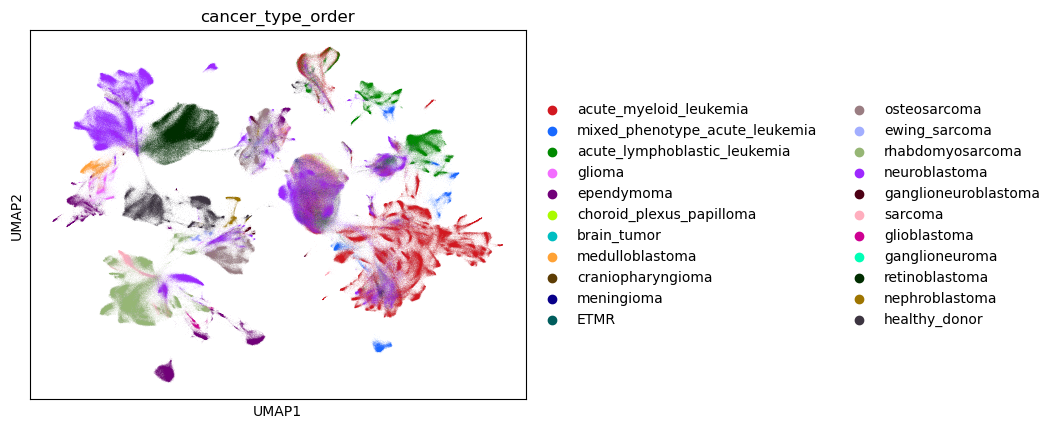

Post-integration

... storing 'cancer_type' as categorical
... storing 'cancer_subtype' as categorical


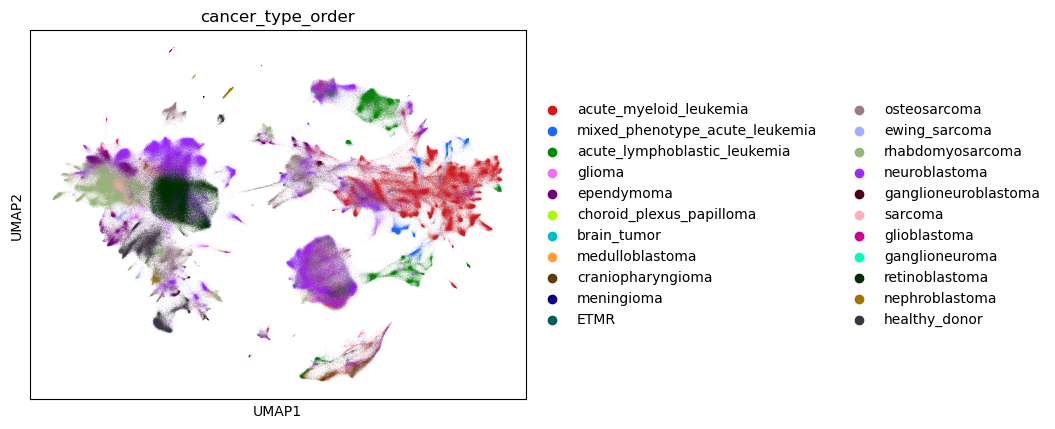

In [120]:
import glasbey

for meta in metas:
    print(meta)
    adata = metas[meta]

    adata.obs['cancer_type_order'] = pd.Categorical(
        values=adata.obs.cancer_type, categories=cancer_type_order, ordered=True
    )

    sc.pl.umap(
        adata,
        color=['cancer_type_order'],
        palette=glasbey.create_palette(palette_size=22), 
    )

In [124]:
prex

AnnData object with n_obs × n_vars = 1300958 × 559
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels', 'major_cancer_type', 'major_cancer_type_order', 'cancer_type_order'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'hvg', 'neighbors', 'pca', 'sample_barcode_colors', 'umap', 'major_cancer_type_order_colors', 'cancer_type_order_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [125]:
postx

AnnData object with n_obs × n_vars = 1300958 × 559
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'major_cancer_type', 'major_cancer_type_order', 'cancer_type_order'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'hvg', 'leiden', 'leiden_scVI_colors', 'neighbors', 'pca', 'sample_barcode_colors', 'umap', 'major_cancer_type_order_colors', 'cancer_type_order_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', '

In [126]:
# Save the cleaned metas
prex.write_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer_clean/all_cancer_meta_anndata_scVI_pca_clean.h5ad', compression='gzip')
postx.write_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/08_all_cancer_clean/all_cancer_meta_anndata_scVI_cluster_clean.h5ad', compression='gzip')

## 2. Update the cancer type info

Dataset `GSE140819` includes not only `neuroblastoma` samples but also `sarcoma` and `glioblastoma` samples. Thus, we need to update these samples with correct cancer type info.

`sarcoma` samples: 

    GSM4186992_HTAPP-951-SMP-4652_TST-V2_channel1

    GSM4186994_HTAPP-951-SMP-4652_CST-V3_channel1

    GSM4186993_HTAPP-951-SMP-4652_TST-V3_channel1

    GSM4186995_HTAPP-975-SMP-4771_TST-V3_channel1

`glioblastoma` samples: 

    GSM4186982_HTAPP-443-SMP-5491_CST_channel1

In [5]:
pre = sc.read_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/all_cancer_meta_anndata_scVI_pca_clean.h5ad')
post = sc.read_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/all_cancer_meta_anndata_scVI_cluster_clean.h5ad')

In [6]:
# Update the cancer type info
sarcoma_sample_barcodes = [
    'GSM4186992_HTAPP-951-SMP-4652_TST-V2_channel1',
    'GSM4186994_HTAPP-951-SMP-4652_CST-V3_channel1',
    'GSM4186993_HTAPP-951-SMP-4652_TST-V3_channel1',
    'GSM4186995_HTAPP-975-SMP-4771_TST-V3_channel1',
]

glioblastoma_sample_barcodes = [
    'GSM4186982_HTAPP-443-SMP-5491_CST_channel1',
]

for adata in [pre, post]:

    adata.obs['major_cancer_type'] = adata.obs['major_cancer_type'].astype(str)

    # Change the major_cancer_type
    for code in sarcoma_sample_barcodes:
        adata.obs.loc[adata.obs['sample_barcode'] == code, 'major_cancer_type'] = 'sarcoma'

    for code in glioblastoma_sample_barcodes:
        adata.obs.loc[adata.obs['sample_barcode'] == code, 'major_cancer_type'] = 'brain_tumor'

In [7]:
for adata in [pre, post]:
    # Make rhabdomyosarcoma to be the subtype of sarcoma
    adata.obs.loc[adata.obs['major_cancer_type'] == 'rhabdomyosarcoma', 'major_cancer_type'] = 'sarcoma'

    # Rename neuroblastoma to neural tumor
    adata.obs.loc[adata.obs['major_cancer_type'] == 'neuroblastoma', 'major_cancer_type'] = 'neural_tumor'

... storing 'major_cancer_type' as categorical


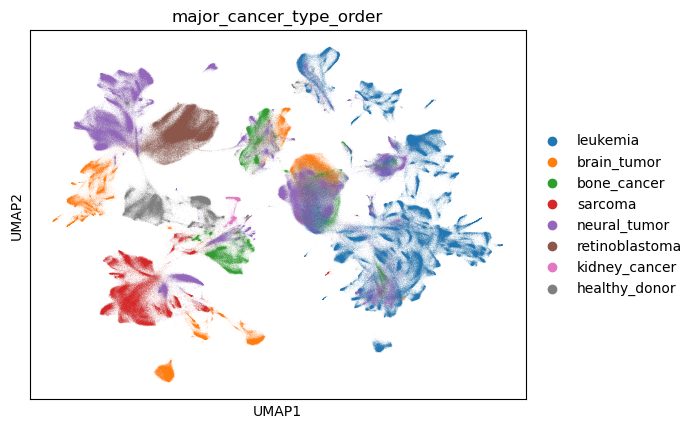

... storing 'major_cancer_type' as categorical


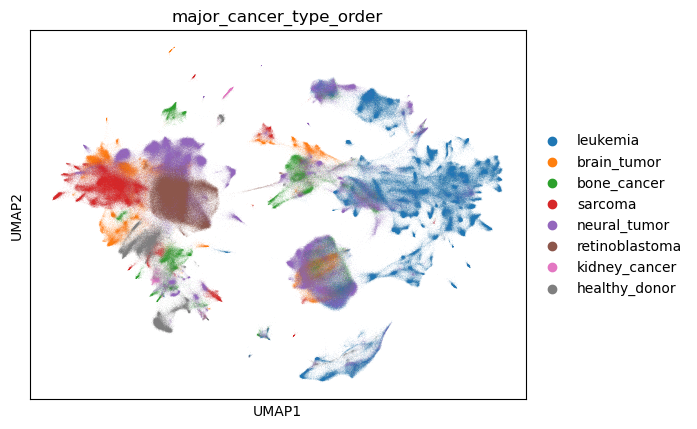

In [8]:
# Plot the UMAP
import pandas as pd

major_cancer_type_order = ['leukemia', 'brain_tumor', 'bone_cancer', 'sarcoma', 'neural_tumor', 'retinoblastoma', 'kidney_cancer', 'healthy_donor']

for adata in [pre, post]:
    adata.obs['major_cancer_type_order'] = pd.Categorical(
        values=adata.obs.major_cancer_type, categories=major_cancer_type_order, ordered=True
    )

    sc.pl.umap(
        adata,
        color=['major_cancer_type_order']
    )

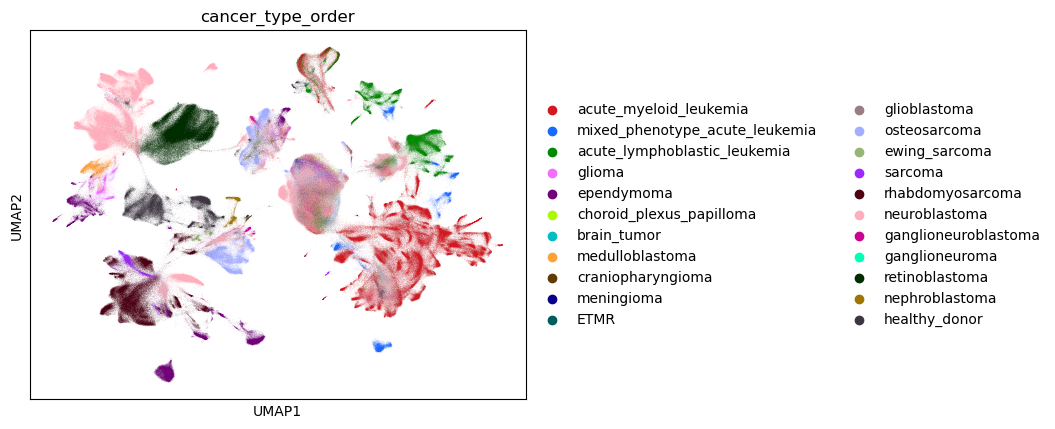

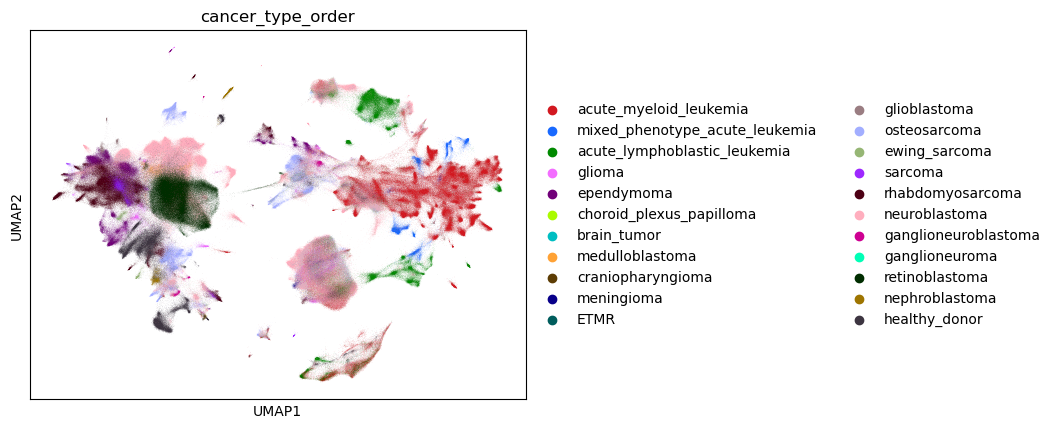

In [9]:
cancer_type_order = [
    'acute_myeloid_leukemia',
    'mixed_phenotype_acute_leukemia',
    'acute_lymphoblastic_leukemia',
    'glioma',
    'ependymoma',
    'choroid_plexus_papilloma',
    'brain_tumor',
    'medulloblastoma',
    'craniopharyngioma',
    'meningioma',
    'ETMR',
    'glioblastoma',
    'osteosarcoma',
    'ewing_sarcoma',
    'sarcoma',
    'rhabdomyosarcoma',
    'neuroblastoma',
    'ganglioneuroblastoma',
    'ganglioneuroma',
    'retinoblastoma',
    'nephroblastoma',
    'healthy_donor'
]

for adata in [pre, post]:
    adata.obs['cancer_type_order'] = pd.Categorical(
        values=adata.obs.cancer_type, categories=cancer_type_order, ordered=True
    )

    sc.pl.umap(
        adata,
        color=['cancer_type_order']
    )

In [10]:
# Save the updated adatas
pre.write_h5ad("/scratch/user/s4543064/Xiaohan_Summer_Research/write/all_cancer_meta_anndata_scVI_pca_clean", compression='gzip')
post.write_h5ad("/scratch/user/s4543064/Xiaohan_Summer_Research/write/all_cancer_meta_anndata_scVI_cluster_clean.h5ad", compression='gzip')